# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import date

# Import API key
from dotenv import load_dotenv
import os
#adds variable from environments - need to pip install python-dotenv
load_dotenv()

# Establish Key Variables
weather_api_key = os.environ.get("weather_api_key")
g_key = os.environ.get("g_key")

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/live_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Tells user code has started
print("Beginning Data Retrieval")
print("-----------------------------")
#initializes dataframe, counts, and lists to pull data
df=pd.DataFrame()
count1 = 1
count2 = 1
cityNames = []
cityLats = []
cityLngs = []
cityMaxTemps = []
cityHumidities = []
cityCloudiness = []
cityWindSpeeds = []
cityCountries = []
cityDates = []
#runs all code in block for each of the cities in the list
for city in cities:
    #pauses for a second - reduces API overload
    time.sleep(1.1)
    #creating URL to pull each city info in imperial units
    query_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    #convets URL data into json
    data = requests.get(query_url).json()
    #if a keyerror is found (no key in JSON file), then will print out "city not found"
    try:
        #prints entry for show - keyerror does NOT happen here
        print(f"Processing Record {count1} of Set {count2} | " + city)
        #first potential keyerror - if tripped will not enter any info into lists
        #otherwise, will append list with data
        cityNames.append(data["name"])
        cityLats.append(data["coord"]['lat'])
        cityLngs.append(data["coord"]["lon"])
        cityMaxTemps.append(data["main"]["temp"])
        cityHumidities.append(data["main"]["humidity"])
        cityCloudiness.append(data["clouds"]["all"])
        cityWindSpeeds.append(data["wind"]["speed"])
        cityCountries.append(data["sys"]["country"])
        cityDates.append(data["dt"])
        #increments "batches" and outputs to user    
        if count1 < 50:
            count1+=1
        elif count1 >= 50:
            count1 = 1    
            count2+=1
    except KeyError:
        print("City not found. Skipping...")
        count1+=1
#fills dataframe with information from lists
df["city"] = cityNames
df["lat"] = cityLats
df["lng"] = cityLngs
df["max_temp"] = cityMaxTemps
df["humidity"] = cityHumidities
df["cloudiness"] = cityCloudiness
df["wind_speed"] = cityWindSpeeds
df["country"] = cityCountries
df["date"] = cityDates
df.head()

cord 36 of Set 9 | fuerte olimpo
Processing Record 37 of Set 9 | araouane
Processing Record 38 of Set 9 | okakarara
Processing Record 39 of Set 9 | pousat
City not found. Skipping...
Processing Record 40 of Set 9 | behbahan
Processing Record 41 of Set 9 | moose factory
Processing Record 42 of Set 9 | hofn
Processing Record 43 of Set 9 | fallon
Processing Record 44 of Set 9 | ojinaga
Processing Record 45 of Set 9 | iquique
Processing Record 46 of Set 9 | adrar
Processing Record 47 of Set 9 | mahanoro
Processing Record 48 of Set 9 | ati
Processing Record 49 of Set 9 | tamandare
Processing Record 50 of Set 9 | gemena
Processing Record 1 of Set 10 | rosarito
Processing Record 2 of Set 10 | dezhou
Processing Record 3 of Set 10 | babanusah
City not found. Skipping...
Processing Record 4 of Set 10 | murchison
Processing Record 5 of Set 10 | neiafu
Processing Record 6 of Set 10 | kalmunai
Processing Record 7 of Set 10 | kashi
Processing Record 8 of Set 10 | kamaishi
Processing Record 9 of Set 

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
0,Hilo,19.73,-155.09,77.00,57,40,6.93,US,1600281924
1,Nouadhibou,20.93,-17.03,80.60,74,0,13.87,MR,1600281926
2,Kutum,14.20,24.67,83.17,30,56,7.56,SD,1600281927
3,Atuona,-9.80,-139.03,78.30,73,0,21.09,PF,1600281928
4,Sitka,57.05,-135.33,53.60,71,20,2.57,US,1600281929


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#exporting the raw file to a CSV
df.to_csv("Resources/WeatherPy_RAW_Output_CSV")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#code pulls only the data from the cities where the humidity is greater than 100%
clean_df = df.loc[df.humidity < 100]

In [6]:
#  Get the indices of cities that have humidity over 100%.

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
#exporting cleaned (humidity>100%) CSV
clean_df.to_csv("Resources/WeatherPy_Clean_Output_CSV")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

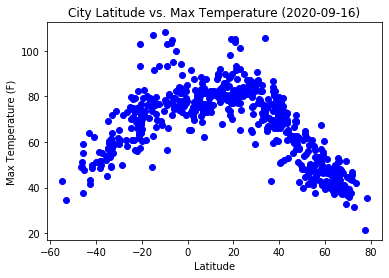

Based on the plot of max temperature vs city latitude we see what we know intuitively to be true, namely that temperature generally rises the closer you are to the equator (the closer that your latitude is to 0). It is interesting to point out, however, that the largest temperatures are not at 0, but at ~20 and ~(-10). This may be due to the landscape in those locations or earth's axis' natural tilt


In [9]:
figure = plt.scatter(clean_df.lat,clean_df.max_temp,color='b')
plt.title(f"City Latitude vs. Max Temperature ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Resources/General_Temperature_Chart.png")
plt.show()
print("Based on the plot of max temperature vs city latitude we see what we know intuitively to be true, namely that temperature generally rises the closer you are to the equator (the closer that your latitude is to 0). It is interesting to point out, however, that the largest temperatures are not at 0, but at ~20 and ~(-10). This may be due to the landscape in those locations or earth's axis' natural tilt")

## Latitude vs. Humidity Plot

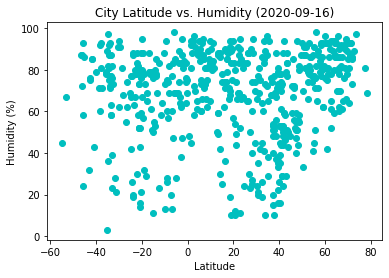

There seem to be slightly less concentrations of low humidities farther from the equator which makes sense as there would be less heat to evaporate water. The majority of humidities near the equator seem to be high, while in that ~20 and ~(-10) range, again, is where the data shows low humidity - which supports our findings on max temperature above.


In [10]:
figure = plt.scatter(clean_df.lat,clean_df.humidity,color='c')
plt.title(f"City Latitude vs. Humidity ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Resources/General_Humidity_Chart.png")
plt.show()
print("There seem to be slightly less concentrations of low humidities farther from the equator which makes sense as there would be less heat to evaporate water. The majority of humidities near the equator seem to be high, while in that ~20 and ~(-10) range, again, is where the data shows low humidity - which supports our findings on max temperature above.")

## Latitude vs. Cloudiness Plot

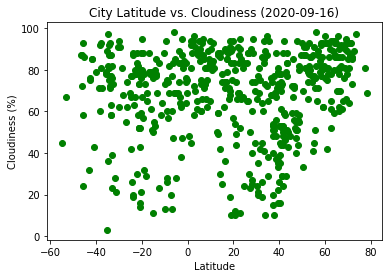

It is interesting to note that this graph is almost identical to the one above measuring humidity. This makes sense since clouds are made of evaporated water. Similar analysis applies.


In [11]:
figure = plt.scatter(clean_df.lat,clean_df.humidity,color='g')
plt.title(f"City Latitude vs. Cloudiness ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Resources/General_Cloudiness_Chart.png")
plt.show()
print("It is interesting to note that this graph is almost identical to the one above measuring humidity. This makes sense since clouds are made of evaporated water. Similar analysis applies.")

## Latitude vs. Wind Speed Plot

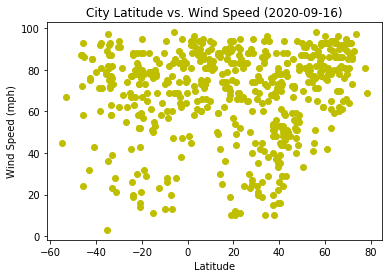

Wind Speed when compared to latitude is also simliar to the humidity and cloudiness graphs, though a bit less so. It seems as though Wind Speed could play a major factor the aspects of climate that relate to humidity and cloudiness.


In [12]:
figure = plt.scatter(clean_df.lat,clean_df.humidity,color='y')
plt.title(f"City Latitude vs. Wind Speed ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Resources/General_Wind_Speed_Chart.png")
plt.show()
print("Wind Speed when compared to latitude is also simliar to the humidity and cloudiness graphs, though a bit less so. It seems as though Wind Speed could play a major factor the aspects of climate that relate to humidity and cloudiness.")

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def Scatter_Plot(x,y,xy):
    #pulls the linear regression data and calculates the variables using the scipy.stats module
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    #put the variables into a formula to calculate the regress values
    regress_values = x * slope + intercept
    #put variables into equation for printing later
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plots the values into a new scatterplot figure
    figure = plt.scatter(x,y)
    #plots the regression line on the graph
    plt.plot(x,regress_values,"r-")
    #puts the line equation on the graph at the bottom-left-most position
    plt.annotate(line_eq,xy=xy,fontsize=20,color="r")
    #print r-squared value
    print(f"The r-squared is: {rvalue**2}")

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = clean_df.loc[clean_df.lat >=0]
southern_df = clean_df.loc[clean_df.lat <0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression


The r-squared is: 0.6888818268494566


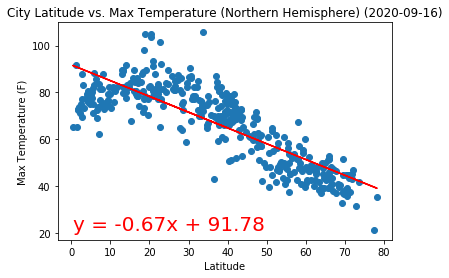

It seems as though latitude and temperature have a medium-negative relationship. Meaning that it generally gets colder the farther north you go. This lower r-value may be due to outliers at ~20 due environmental factors and axis tilt.


In [15]:
#establishes bottom-left-most point to pass into Scatter_Plot function for label consistnecy
xy = (northern_df.lat.min(),northern_df.max_temp.min())
#plots graph using function declared above, adds titles/labels and saves to .png file
Scatter_Plot(northern_df.lat,northern_df.max_temp,xy)
plt.title(f"City Latitude vs. Max Temperature (Northern Hemisphere) ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Resources/Northern_Temperature_Chart.png")
plt.show()
print("It seems as though latitude and temperature have a medium-negative relationship. Meaning that it generally gets colder the farther north you go. This lower r-value may be due to outliers at ~20 due environmental factors and axis tilt.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5801528706090138


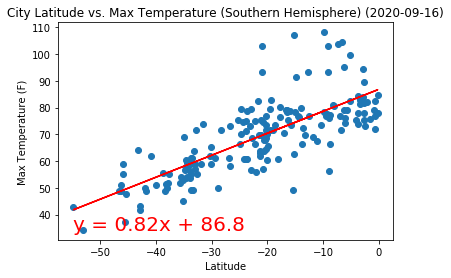

In the Southern hemispherere, there is a much higher correlation than in the Northern hemisphere. This may be due to more landmass in the Northern hemisphere disipating heat differently than ocean water. We do still see the outlier spike at ~(-10), however, it is less pronounced than in the Northern hemisphere and does not affect the r-value so significantly.


In [16]:
#establishes bottom-left-most point to pass into Scatter_Plot function for label consistency
xy = (southern_df.lat.min(),southern_df.max_temp.min())
#plots graph using function declared above, adds titles/labels and saves to .png file
Scatter_Plot(southern_df.lat,southern_df.max_temp,xy)
plt.title(f"City Latitude vs. Max Temperature (Southern Hemisphere) ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Resources/Southern_Temperature_Chart.png")
plt.show()
print("In the Southern hemispherere, there is a much higher correlation than in the Northern hemisphere. This may be due to more landmass in the Northern hemisphere disipating heat differently than ocean water. We do still see the outlier spike at ~(-10), however, it is less pronounced than in the Northern hemisphere and does not affect the r-value so significantly.")

####  Northern Hemisphere - Humidity vs. Latitude Linear Regression

The r-squared is: 0.0142430681991947


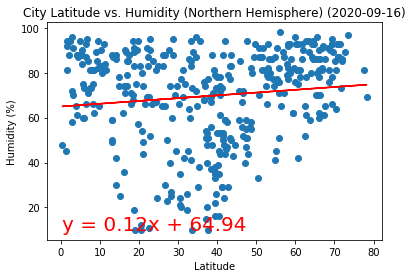

This graph shows what we expected above, but were not able to prove certainly. From this r-value, we can tell with a fair degree of certainty that latitude and humidity are not correlated. This means that they do not consistently affect each other positively or negatively.


In [17]:
#establishes bottom-left-most point to pass into Scatter_Plot function for label consistency
xy = (northern_df.lat.min(),northern_df.humidity.min())
#plots graph using function declared above, adds titles/labels and saves to .png file
Scatter_Plot(northern_df.lat,northern_df.humidity,xy)
plt.title(f"City Latitude vs. Humidity (Northern Hemisphere) ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Resources/Northern_Humidity_Chart.png")
plt.show()
print("This graph shows what we expected above, but were not able to prove certainly. From this r-value, we can tell with a fair degree of certainty that latitude and humidity are not correlated. This means that they do not consistently affect each other positively or negatively.")

####  Southern Hemisphere - Humidity vs. Latitude Linear Regression

The r-squared is: 0.0015456709342707474


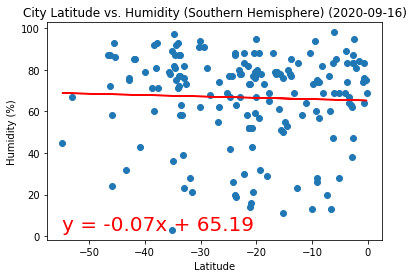

Similarly to the Northern hemisphere Humidity chart, the Southern hemisphere chart shows virtually no correlation as well. The data does, however, look much more sparse in the Southern hemisphere. This, again, could be attributed to less landmass and, therefore, less cities.


In [18]:
#establishes bottom-left-most point to pass into Scatter_Plot function for label consistency
xy = (southern_df.lat.min(),southern_df.humidity.min())
#plots graph using function declared above, adds titles/labels and saves to .png file
Scatter_Plot(southern_df.lat,southern_df.humidity,xy)
plt.title(f"City Latitude vs. Humidity (Southern Hemisphere) ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Resources/Southern_Humidity_Chart.png")
plt.show()
print("Similarly to the Northern hemisphere Humidity chart, the Southern hemisphere chart shows virtually no correlation as well. The data does, however, look much more sparse in the Southern hemisphere. This, again, could be attributed to less landmass and, therefore, less cities.")

####  Northern Hemisphere - Cloudiness vs. Latitude Linear Regression

The r-squared is: 0.004775244714817786


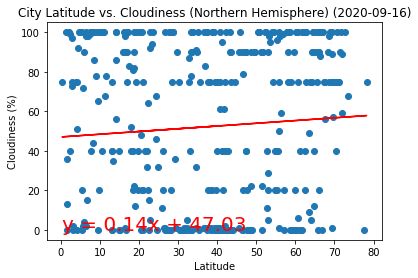

Since they were so similar, it is no surprise that the Humidity and Cloudiness charts so similarly show no correlation. in looking at the graph, there see to be many points that are on the same percentage of cloudiness. It leads me to believe that there are factors that may create 'breakpoints' in cloudiness percentage OR that the data is communicated in such a way that certain cloudiness percentages are more common.


In [19]:
#establishes bottom-left-most point to pass into Scatter_Plot function for label consistency
xy = (northern_df.lat.min(),northern_df.cloudiness.min())
#plots graph using function declared above, adds titles/labels and saves to .png file
Scatter_Plot(northern_df.lat,northern_df.cloudiness,xy)
plt.title(f"City Latitude vs. Cloudiness (Northern Hemisphere) ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Resources/Northern_Cloudiness_Chart.png")
plt.show()
print("Since they were so similar, it is no surprise that the Humidity and Cloudiness charts so similarly show no correlation. in looking at the graph, there see to be many points that are on the same percentage of cloudiness. It leads me to believe that there are factors that may create 'breakpoints' in cloudiness percentage OR that the data is communicated in such a way that certain cloudiness percentages are more common.")

####  Southern Hemisphere - Cloudiness vs. Latitude Linear Regression

The r-squared is: 0.025590425672806994


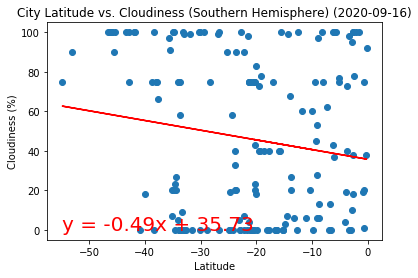

The most interesting graph and a good example of the benefit of data analysis. While the Northern hemisphere showed us what we expected, the Southern hemisphere cloudiness graph shows a bit more correlation than the Humidity graph. There may be more of a pattern of cloudiness that has a larger effect on temperature in those locations, or vice versa.


In [20]:
#establishes bottom-left-most point to pass into Scatter_Plot function for label consistency
xy = (southern_df.lat.min(),southern_df.cloudiness.min())
#plots graph using function declared above, adds titles/labels and saves to .png file
Scatter_Plot(southern_df.lat,southern_df.cloudiness,xy)
plt.title(f"City Latitude vs. Cloudiness (Southern Hemisphere) ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Resources/Southern_Cloudiness_Chart.png")
plt.show()
print("The most interesting graph and a good example of the benefit of data analysis. While the Northern hemisphere showed us what we expected, the Southern hemisphere cloudiness graph shows a bit more correlation than the Humidity graph. There may be more of a pattern of cloudiness that has a larger effect on temperature in those locations, or vice versa.")

####  Northern Hemisphere - Wind Speed vs. Latitude Linear Regression

The r-squared is: 0.004978017880813827


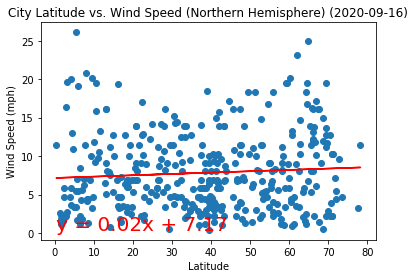

Again, our calculations match our initial interpretation. The latitude and wind speed are not related, though it does seem like the highest wind speed outliers seem to be more concentrated closer to the equator. In general, however, there does not seem to be a correlation.


In [21]:
#establishes bottom-left-most point to pass into Scatter_Plot function for label consistency
xy = (northern_df.lat.min(),northern_df.wind_speed.min())
#plots graph using function declared above, adds titles/labels and saves to .png file
Scatter_Plot(northern_df.lat,northern_df.wind_speed,xy)
plt.title(f"City Latitude vs. Wind Speed (Northern Hemisphere) ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Resources/Northern_Wind_Speed_Chart.png")
plt.show()
print("Again, our calculations match our initial interpretation. The latitude and wind speed are not related, though it does seem like the highest wind speed outliers seem to be more concentrated closer to the equator. In general, however, there does not seem to be a correlation.")

####  Southern Hemisphere - Wind Speed vs. Latitude Linear Regression

The r-squared is: 1.522735259239583e-05


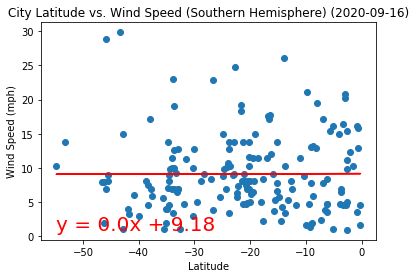

We do show a slightly higher correlation in the Southern hemisphere than in the Northern hemisphere again due to the factors that were discussed prior. The latitude in the southern hemisphere does not seem to have much of an effect on wind speed and also shows the highest outliers clustered nearer to ~(-35), which does not match the Northern hemisphere for wind speed. In conclusion, however, the correlation is too small to justify saying that there is any significant relationship.


In [22]:
#establishes bottom-left-most point to pass into Scatter_Plot function for label consistency
xy = (southern_df.lat.min(),southern_df.wind_speed.min())
#plots graph using function declared above, adds titles/labels and saves to .png file
Scatter_Plot(southern_df.lat,southern_df.wind_speed,xy)
plt.title(f"City Latitude vs. Wind Speed (Southern Hemisphere) ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Resources/Southern_Wind_Speed_Chart.png")
plt.show()
print("We do show a slightly higher correlation in the Southern hemisphere than in the Northern hemisphere again due to the factors that were discussed prior. The latitude in the southern hemisphere does not seem to have much of an effect on wind speed and also shows the highest outliers clustered nearer to ~(-35), which does not match the Northern hemisphere for wind speed. In conclusion, however, the correlation is too small to justify saying that there is any significant relationship.")